In [53]:
import numpy as np
import pandas as pd
from sklearn.utils.random import sample_without_replacement
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("/home/prasun/GitDemo/Statresure_/application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [55]:
df.AMT_INCOME_TOTAL.max(),df.AMT_INCOME_TOTAL.min()

(6750000.0, 26100.0)

In [56]:
# randomly taking 1000 samples
idx = sample_without_replacement(df.shape[0],1000,random_state= 10)

In [57]:
#The Sample
smpl = df.iloc[idx]

<Axes: xlabel='Income Group', ylabel='Frequency'>

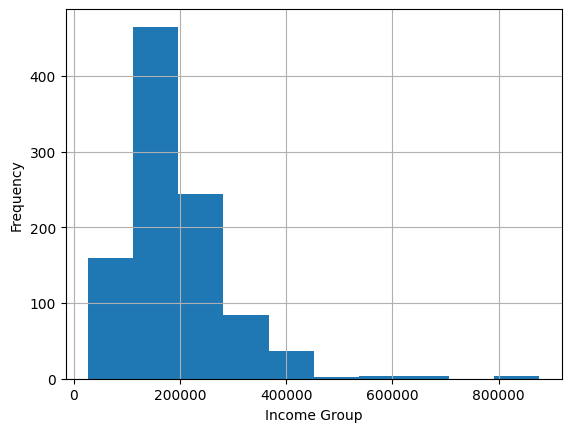

In [58]:
#Income Distribution
plt.Figure(figsize=(2,2))
plt.xlabel("Income Group")
plt.ylabel("Frequency")
smpl.AMT_INCOME_TOTAL.hist()

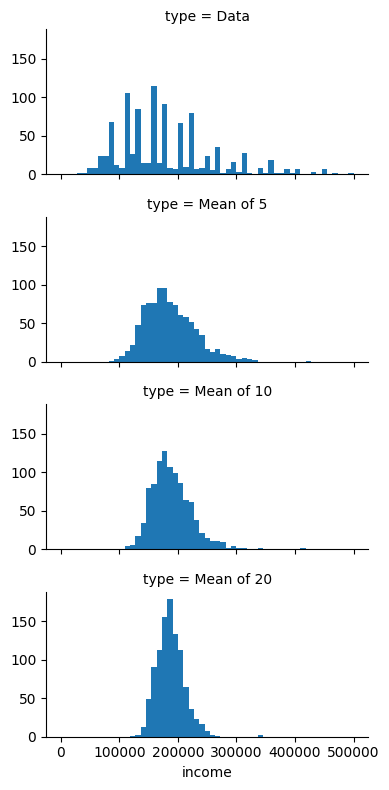

In [63]:
sample_data = pd.DataFrame({"income":df["AMT_INCOME_TOTAL"].sample(1000),
"type":"Data"
})

sample_mean_05 = pd.DataFrame({
    "income":[df["AMT_INCOME_TOTAL"].sample(5).mean() for _ in range(1000)],
    "type":"Mean of 5"
})

sample_mean_10 = pd.DataFrame({
    "income":[df["AMT_INCOME_TOTAL"].sample(10).mean() for _ in range(1000)],
    "type":"Mean of 10"
})

sample_mean_20 = pd.DataFrame({
    "income":[df["AMT_INCOME_TOTAL"].sample(20).mean() for _ in range(1000)],
    "type":"Mean of 20"
})
results = pd.concat([sample_data, sample_mean_05,sample_mean_10,sample_mean_20])

results.head()

g = sns.FacetGrid(results, col="type",col_wrap=1,height=2,aspect=2)
g.map(plt.hist,"income",range=[0,500000],bins = 55)